<a href="https://colab.research.google.com/github/HIsu1231/NLP_inflearn/blob/main/%EA%B5%AD%EB%AF%BC%EC%B2%AD%EC%9B%90_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EB%B0%8F_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

 import warnings
 warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
from plotnine import *

print(pd.__version__)
print(np.__version__)

1.1.5
1.19.5


###데이터 불러오기

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
url = 'https://drive.google.com/open?id=1d8VEAj6n83wT1YRlCrhoU_1mMSvYpXc4'

id = url.split('=')[1]
print(id)

1d8VEAj6n83wT1YRlCrhoU_1mMSvYpXc4


In [ ]:
%ls

adc.json  sample_data/


In [ ]:
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('petition.csv')

In [ ]:
petitions = pd.read_csv('petition.csv', index_col=0, parse_dates=['start','end'])

petitions.shape

(377756, 7)

###데이터 미리보기

In [ ]:
petitions.head(3)

,start,end,answered,votes,category,title,content
article_id,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [ ]:
petitions.tail(3)

,start,end,answered,votes,category,title,content
article_id,,,,,,,
492041,2019-01-09,2019-02-08,0,1,외교/통일/국방,남한땅에 옥류관을 오픈해주세요,말그대로 옥류관을 여기서 열면 진짜 재미있고 신나는 일이 일어날것 같은 느낌이 듭니...
492042,2019-01-09,2019-02-08,0,4,정치개혁,임종석실장님 수고많으셨습니다.,범죄정권이후 많은 어려움을 갖고 시작한 국민의정부.\n저급한 자칭 보수단체와 한국당...
492043,2019-01-09,2019-02-08,0,1,행정,예천군과 환경부를 규탄합니다. 어불성설인 가축사육 관련 법규를 개정해주세요!,해당 사건이 발생한 곳은 요즘은 매체에서 매일 나오는 곳으로 '군의원의 외유성 해외...


In [ ]:
petitions.columns

Index(['start', 'end', 'answered', 'votes', 'category', 'title', 'content'], dtype='object')

In [ ]:
petitions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377756 entries, 21 to 492043
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   start     377756 non-null  datetime64[ns]
 1   end       377756 non-null  datetime64[ns]
 2   answered  377756 non-null  int64         
 3   votes     377756 non-null  int64         
 4   category  377756 non-null  object        
 5   title     377756 non-null  object        
 6   content   377755 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 23.1+ MB


In [ ]:
#숫자 데이터의 count, mean, std, min값 등 출력
petitions.describe()

,answered,votes
count,377756.000000,3.777560e+05
mean,0.000077,1.514069e+02
std,0.008761,4.842551e+03
min,0.000000,0.000000e+00
25%,0.000000,1.000000e+00
50%,0.000000,5.000000e+00
75%,0.000000,1.500000e+01
max,1.000000,1.192049e+06


###결측치 확인

In [ ]:
petitions.isnull().sum()

start       0
end         0
answered    0
votes       0
category    0
title       0
content     1
dtype: int64

### 답변 대상 청원 컬럼 다시 만들기

In [ ]:
petitions['answer'] = (petitions['votes'] > 200000) == 1
petitions.shape

(377756, 8)

In [ ]:
petitions.head(3)

,start,end,answered,votes,category,title,content,answer
article_id,,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...,False
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,False
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",False


###청원 기간 컬럼 생성

In [ ]:
petitions['duration'] = petitions['end'] - petitions['start']
petitions.sort_values('duration', ascending=True).head(3)

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
13577,2017-09-12,2017-09-19,0,20,육아/교육,사립유치원의 집단휴업을 반대합니다,국공립 유치원도 없고 국공립어린이집 들어가기도 힘든 실정에 사립유치원은 부모들의 어...,False,7 days
4213,2017-09-05,2017-09-12,0,1,인권/성평등,청소년 보호법이 아니라 소년법입니다...,소년법 폐지 청원합니다,False,7 days
4214,2017-09-05,2017-09-12,0,0,정치개혁,소년법 강화,이번 부산여중생 사건을보고 느낍니다.\n소년법 폐지해주셨으면 좋겠습니다.\n아님 강...,False,7 days


In [ ]:
petitions['duration'].value_counts()

30 days    366556
90 days      6754
7 days       2436
15 days      1204
60 days       806
Name: duration, dtype: int64

In [ ]:
petitions.loc[(petitions['duration'] == '90days') & (petitions['answer'] == 1)]

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,True,90 days


In [ ]:
petitions.loc[(petitions['duration'] == '60days') & (petitions['answer'] == 1)]

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
1785,2017-09-03,2017-11-02,1,296330,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...,True,60 days


In [ ]:
petitions.loc[(petitions['duration'] == '30days') & (petitions['answer'] == 1)]

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
18278,2017-09-30,2017-10-30,1,235372,인권/성평등,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...,True,30 days
26024,2017-11-04,2017-12-04,1,216774,안전/환경,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.,"'주취감형'이란, 술을 먹고 범행을 저지를 때, 심신미약 (이성이 없고 우발적)이라...",True,30 days
45581,2017-11-17,2017-12-17,1,281985,보건복지,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원","청원사항)\n중증외상분야의 추가적, 제도적, 환경적, 인력 지원 방안마련\n현 의료...",True,30 days
49083,2017-11-24,2017-12-24,1,211064,기타,"전안법. 18살, 미성년자에게 정부가 직접 찍어주는 범죄자 낙인!","3년 이하의 징역, 또는3천만원 이하의 벌금. 혹은 500만원 이하의 과태료.\n설...",True,30 days
57132,2017-12-03,2018-01-02,1,255554,성장동력,전안법 합리적으로 개정 또는 폐지해주세요.(소상공인 소비자 모두 죽는법안입니다.),2017년 1월 28일부터 시행되는 법령으로 국가기술표준원에서 관리하는 전기제품에만...,True,30 days
...,...,...,...,...,...,...,...,...,...
454045,2018-11-27,2018-12-27,0,214251,반려동물,도살장에서 망치로 머리를 맞던 개가 잠시 튀어나가 옆에있는 자신의 새끼에게 젖물리며...,아래의 링크를 봐주세요\n사람과 똑같이 자신의 자식을 귀히여기고 사람과 똑같이 죽는...,True,30 days
462340,2018-12-06,2019-01-05,0,221317,육아/교육,짐승보다 못한 위탁모 에게 굶기고 맞아죽은 15개월된 저희딸 얘기좀 들어주세요....,짐승 같은 위탁모(김모씨) 에게 맞아 죽은 15개월 된 저희 딸 서원이가 억울하게 ...,True,30 days
462623,2018-12-07,2019-01-06,0,243938,정치개혁,국회의원 내년 연봉 2000만원 인상 추진..최저임금 인상률보다 높은 14%.. 셀...,국회의원 내년 연봉 2000만원 인상 추진..최저임금 인상률보다 높은 14%로 인상...,True,30 days


###청원이 가장 많이 들어온 분야

In [ ]:
category = pd.DataFrame(petitions['category'].value_counts()).reset_index()
category.columns = ['category', 'counts']
category

,category,counts
0,정치개혁,59020
1,기타,46449
2,인권/성평등,33738
3,안전/환경,29196
4,교통/건축/국토,26910
5,외교/통일/국방,25705
6,육아/교육,24861
7,보건복지,23608
8,일자리,22111
9,행정,19373


In [ ]:
start_df = pd.DataFrame(petitions['start'].value_counts()).reset_index()
start_df.columns = ['start', 'counts']
start_df = start_df.sort_values('counts', ascending=False)
print('청원 집계: {}일'.format(start_df.shape[0]))
start_df.head()

청원 집계: 509일


,start,counts
0,2017-11-11,9623
1,2017-09-05,5952
2,2018-01-11,3368
3,2018-02-06,2631
4,2017-11-09,2487


###피벗 테이블로 가장 투표를 많이 받은 분야 보기

In [ ]:
petitions_unique = pd.pivot_table(petitions, index=['category'], aggfunc=np.sum)
petitions_best = petitions_unique.sort_values(by='votes', ascending=False).reset_index()
petitions_best

,category,answer,answered,votes
0,인권/성평등,23,9,12225998
1,안전/환경,10,2,6512799
2,정치개혁,7,2,5686172
3,기타,7,1,4720310
4,육아/교육,3,1,4420589
5,보건복지,3,2,4269399
6,문화/예술/체육/언론,7,4,4086382
7,외교/통일/국방,4,1,3637926
8,교통/건축/국토,3,2,2834727
9,반려동물,4,0,2023905


###투표를 가장 많이 받은 날

In [ ]:
petitions_start = pd.pivot_table(petitions, index=['start'], aggfunc=np.sum)
votes_df = petitions_start.sort_values(by='votes', ascending=False)
votes_df.loc[petitions_start['votes'] > 350000]

,answer,answered,votes
start,,,
2018-10-17,1,0,1300523
2018-10-31,2,0,827096
2018-06-13,1,0,786157
2018-10-18,2,0,721524
2018-02-19,1,1,701520
2018-11-09,2,0,672819
2018-07-22,1,0,672491
2017-09-06,1,1,648209
2018-06-24,2,0,628925


### 청원을 많이 받은 날 vs 투표를 많이 받은 날

In [ ]:
votes_df = votes_df.reset_index()
votes_df.head()

,start,answer,answered,votes
0,2018-10-17,1,0,1300523
1,2018-10-31,2,0,827096
2,2018-06-13,1,0,786157
3,2018-10-18,2,0,721524
4,2018-02-19,1,1,701520


In [ ]:
hottest_day_df = start_df.merge(votes_df, on='start', how='left')
hottest_day_df.sort_values('votes', ascending=False)[:5]

,start,counts,answer,answered,votes
113,2018-10-17,926,1,0,1300523
80,2018-10-31,1010,2,0,827096
365,2018-06-13,542,1,0,786157
74,2018-10-18,1032,2,0,721524
258,2018-02-19,698,1,1,701520


In [ ]:
hottest_day_df.sort_values('counts', ascending=False)[:5]

,start,counts,answer,answered,votes
0,2017-11-11,9623,0,0,85074
1,2017-09-05,5952,0,0,48808
2,2018-01-11,3368,0,0,44570
3,2018-02-06,2631,0,0,83038
4,2017-11-09,2487,0,0,34774


###답변 대상 청원

In [ ]:
answered_df = petitions.loc[petitions['votes'] > 200000]
print('답변 대상 청원: {}건'.format(answered_df.shape[0]))

답변 대상 청원: 77건


In [ ]:
answered_df.head(3)

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
1785,2017-09-03,2017-11-02,1,296330,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...,True,60 days
10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,True,90 days
18278,2017-09-30,2017-10-30,1,235372,인권/성평등,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...,True,30 days


###답변 대상 청원 중 투표를 가장 많이 받은 청원

In [ ]:
answered_df.sort_values('votes', ascending=False).head(10)

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...,True,30 days
269548,2018-06-13,2018-07-13,0,714875,외교/통일/국방,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ...",2012년 난민법 제정으로 인해 외국인은 한달 무비자로 입국할 수 있으나 난민신청자...,True,30 days
10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,True,90 days
142600,2018-02-19,2018-03-21,1,614127,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다","오늘 여자 단체전 팀추월에서 김보름, 박지우 선수는 팀전인데도 불구하고 개인의 영달...",True,30 days
230552,2018-05-11,2018-06-10,1,419006,인권/성평등,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...,True,30 days
426834,2018-10-31,2018-11-30,0,416093,인권/성평등,"132cm, 31kg의 왜소한 50대 여성이 180cm가 넘는 건장한 20세 남성에...",http://m.news1.kr/articles/?3464603\n관련 기사입니다....,True,30 days
314584,2018-07-22,2018-08-21,0,413924,육아/교육,23개월 아기가 폭행에 장이 끊어져 죽었습니다.,고생하시는 청와대 관계자 및 대통령님.\n이 글을 꼭 한번만 읽어주세요.\n너무나 ...,True,30 days
395955,2018-10-02,2018-11-01,1,406655,교통/건축/국토,음주운전 교통사고로 친구 인생이 박살났습니다. 제발 도와주세요,"9월 25일 새벽 2시 25분 경, 부산 해운대구 미포 오거리에서 술에 만취한 운전...",True,30 days
437737,2018-11-09,2018-12-09,0,397079,인권/성평등,억울하게 떠나신 저의 아버지의 원한을 풀어주세요,46일동안 눈 한번 뜨시지 못한 채 11월 6일 새벽 4시에 저의 아버지가 억울하게...,True,30 days


#시각화

###시각화를 위한 한글폰트 설치

In [ ]:
#그래프에 retina display 적용
%config inlineBackend.figure_format = 'retina'

#나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [ ]:
#기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

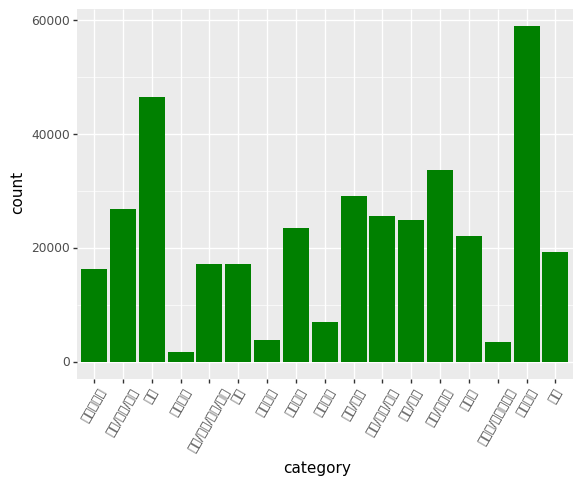

<ggplot: (-9223363285508129557)>

In [ ]:
(ggplot(petitions)
  + aes('category')
  + geom_bar(fill='green')
  + theme(text=element_text(family='NanumBarunGothic'),
            axis_text_x=element_text(rotation=60))
)